In [1]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
from pathlib import Path
import os, sys, jpype
from konlpy import jvm as konlpy_jvm

# 1) Point to the DLL you found from you devise
jvm_path = Path(r"C:\\Users\\***\\miniconda3\\envs\\textmining\\Library\\lib\\jvm\\bin\\server\\jvm.dll")
assert jvm_path.is_file(), f"Not found: {jvm_path}"

os.environ["JAVA_HOME"] = str(jvm_path.parents[4])   

# 2) Start JVM once per Python process
if not jpype.isJVMStarted():
    konlpy_jvm.init_jvm(jvmpath=str(jvm_path), max_heap_size=2048)

In [3]:
hannanum = Hannanum()

In [4]:
Data = pd.read_csv(r"...\군집분석데이터.csv",encoding='cp949')

In [5]:
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [6]:
# Extract Nouns using Hannanum Morphological Analyzer
docs = []
for i in Data['기사내용']: 
    docs.append(hannanum.nouns(i))

In [7]:
# Join the Extracted Nouns into a Single String with Spaces
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [8]:
# Vectorization - DTM (Document-Term Matrix)
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [9]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

In [10]:
df

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


# Hierarchical Clustering
**Agglomerative Clustering**
- Unlike K-Means, this model starts by treating every data point (all 15 documents) as its own cluster. Then, it merges the two closest clusters, repeating this process until only 3 clusters remain.

In [11]:
# 'ward' linkage merges clusters in a way that minimizes the variance increase.
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward') 
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

- **ward**: (Most common) Merges to minimize variance.
- **single**: Based on the closest points (minimum distance).
- **complete**: Based on the farthest points (maximum distance).
- **average**: Based on the average distance between all points.

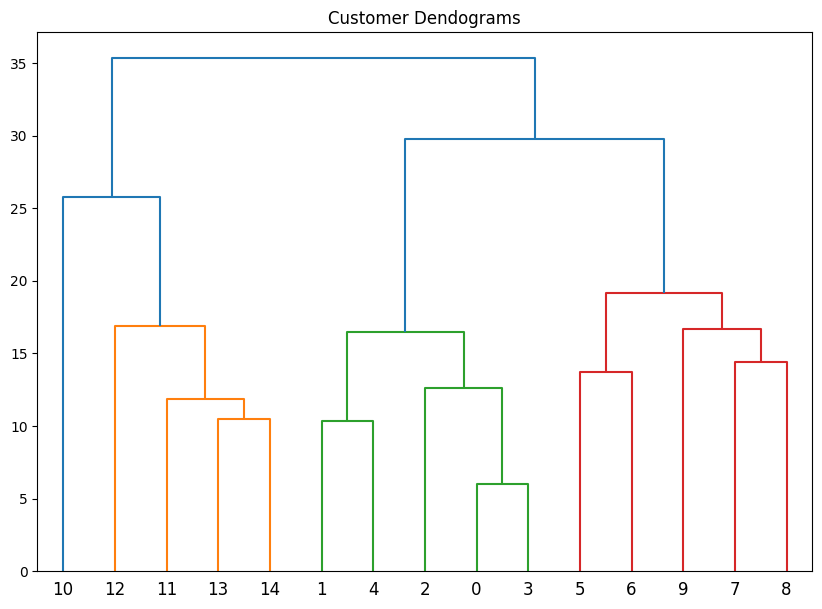

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

- **Group 1 (Red)**: [5, 6, 7, 8, 9] (Radon)

- **Group 2 (Green)**: [0, 1, 2, 3, 4] (Yuhan Corp)

- **Group 3 (Blue/Orange)**: [10, 11, 12, 13, 14] (King of Mask Singer Wang S-Bam)

# Using TF-IDF for K means

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer() 
X = vec.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

In [14]:
df

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0.000000,0.000000,0.000000,0.000000,0.182407,0.000000,0.141350,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.072612,0.000000,0.000000,0.072612,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.080221,0.000000,0.103522,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.155423,0.000000,0.000000,0.000000,0.200569,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068982,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089019,0.000000
5,0.000000,0.000000,0.110325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.097632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097632,0.000000,...,0.000000,0.000000,0.097632,0.097632,0.000000,0.097632,0.000000,0.000000,0.000000,0.097632
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068105,...,0.000000,0.000000,0.000000,0.000000,0.078433,0.000000,0.078433,0.000000,0.000000,0.000000
8,0.000000,0.064850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.066463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066463,...,0.076541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df) # 3 clusters (groups)

# n_clusters=3: Sets the number of clusters to 3 (since we know there are 3 topics).
# .fit(df): Trains the model on the DTM data.

In [18]:
# K-Means clustering result
kmeans.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [20]:
pca = PCA(n_components=2) # 2 new axes (principal component 1, principal component 2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# 1. PCA(n_components=2): Initializes PCA to reduce data to 2 dimensions.
# 2. pca.fit_transform(df): Applies the PCA reduction to the DTM.
# 3. The result is stored in a new DataFrame, principalDf.

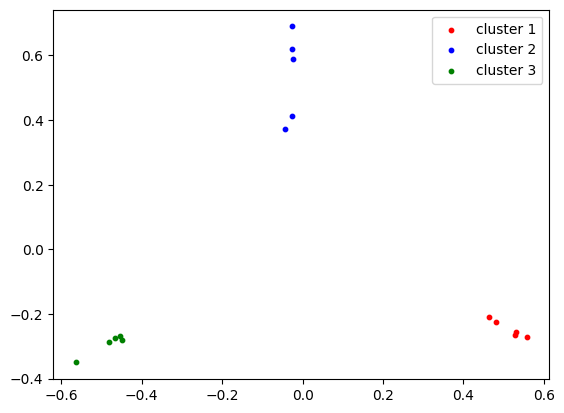

In [21]:
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster 1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster 2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster 3')
plt.legend()

In [22]:
# Create a cross-tabulation (contingency table) comparing the 'SearchQuery' column and 'kmeans.labels_'
comparison = pd.crosstab(Data['검색어'], kmeans.labels_)
 
# print() is not needed in a notebook cell to display
comparison

col_0,0,1,2
검색어,,,
라돈,0,5,0
복면가왕 왕밤빵,5,0,0
유한양행,0,0,5
